# Descriptive plots 

Some descriptives plots using Chetty's data (life expectancy).

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
%matplotlib inline

In [2]:
py.sign_in(username='sdaza', api_key='Mw1b4p20xXxuK5thsdSg')

In [3]:
# load data

# covariates
cov = pd.read_stata('/Users/sdaza/GoogleDrive/00Dissertation/Chapters/ch02/data/cty_full_covariates.dta')
print(cov.shape)

# life expectancy
le = pd.read_stata('/Users/sdaza/GoogleDrive/00Dissertation/Chapters/ch02/data/cty_leBY_gnd_hhincquartile.dta')
print(le.shape)

(3138, 83)
(12472, 9)


In [4]:
# life expectancy
q_values = ['Q'+str(i) for i in le.hh_inc_q.unique()]
d = dict(zip(range(1,5), q_values))
le['income_q'] = le.hh_inc_q.map(d)

le.rename(columns = {'cty':'county', 'gnd':'gender', 'le_raceadj':'le'}, inplace=True)

vars = ['county', 'gender', 'income_q', 'le']
le = le.loc[:,vars]


# covariates 


names = ['cty', 'county_name', 'cty_pop2000', 'statename', 'stateabbrv', 
        'pop_density', 'gini99', 's_rank', 'e_rank_b', 'cs00_seg_inc', 
         'cs_race_theil_2000', 'hhinc00']

nnames = ['county', 'county_name', 'population', 'statename', 'stateabbrv', 
        'density', 'gini', 'relative_mob', 'absolute_mob', 'segregation_income', 
          'segregation_race', 'income']


d = dict(zip(names, nnames))
cov.rename(columns=d, inplace=True)
cov = cov.loc[:, nnames]

In [5]:
cov.dropna(subset=['gini', 'absolute_mob', 'relative_mob'])

,county,county_name,population,statename,stateabbrv,density,gini,relative_mob,absolute_mob,segregation_income,segregation_race,income
0,1001,Autauga,43671,Alabama,AL,73.277412,0.379976,40.602394,41.872879,0.036455,0.128216,34379.539062
1,1003,Baldwin,140415,Alabama,AL,87.960236,0.489738,25.488312,44.492390,0.032571,0.100549,39219.597656
2,1005,Barbour,29038,Alabama,AL,32.814877,0.490637,42.124779,37.718758,0.021680,0.039993,24274.195312
3,1007,Bibb,20826,Alabama,AL,33.427227,0.417098,45.493622,42.245155,0.017462,0.103550,24927.521484
4,1009,Blount,51024,Alabama,AL,79.035255,0.333042,25.050438,49.043320,0.013379,0.079703,30229.857422
5,1011,Bullock,11714,Alabama,AL,18.742023,0.462181,23.596397,37.232834,0.021242,0.047157,18084.560547
6,1013,Butler,21399,Alabama,AL,27.545246,0.498884,38.330711,40.244465,0.023980,0.092676,30493.453125
7,1015,Calhoun,112249,Alabama,AL,184.480026,0.430819,33.462097,42.289951,0.053608,0.208091,31739.220703
8,1017,Chambers,36583,Alabama,AL,61.260845,0.421711,37.232124,38.910061,0.006901,0.082469,28871.576172
9,1019,Cherokee,23988,Alabama,AL,43.368462,0.404792,29.567589,44.802982,0.005631,0.014170,28795.927734


In [8]:
df = pd.merge(le, cov, left_on='county', right_on='county', how='left')
df = df.dropna(subset=['le', 'relative_mob', 'absolute_mob', 'income'])

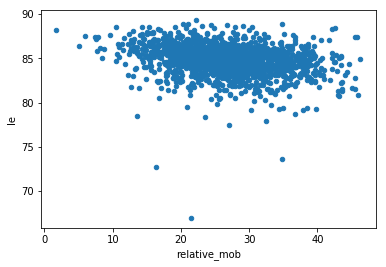

In [9]:
ft = (df.gender=='M') & (df.income_q=='Q4')
df.loc[ft,['le', 'relative_mob']].plot(x='relative_mob', y='le', kind='scatter', loglog=False)

In [11]:
def text_counties(df, selection):
    counties = list(df.loc[selection, 'county_name'].values +  ', '  + df.loc[selection, 'stateabbrv'].values)
    pop = ['<br/>Population: '+str(p) for p in df.loc[selection, 'population']]
    return [a + ' ' +  b for a,b in zip(counties, pop)]

In [13]:
ft = (df.gender=='M') & (df.income_q=='Q1')
counties = df.loc[ft, 'county_name'].values +  ', '  + df.loc[ft, 'stateabbrv']

pop = ['<br>Population: '+str(p) for p in df.loc[ft, 'population']]

In [14]:
text_counties(df, ft)[1:10]

['Baldwin, AL <br/>Population: 140415',
 'Barbour, AL <br/>Population: 29038',
 'Blount, AL <br/>Population: 51024',
 'Calhoun, AL <br/>Population: 112249',
 'Chambers, AL <br/>Population: 36583',
 'Chilton, AL <br/>Population: 39593',
 'Clarke, AL <br/>Population: 27867',
 'Coffee, AL <br/>Population: 43615',
 'Colbert, AL <br/>Population: 54984']

In [ ]:
trace1 = go.Scatter(
    y = np.random.randn(500),
    mode='markers',
    marker=dict(
        size='16',
        color = np.random.randn(500), #set color equal to a variable
        colorscale='Viridis',
        showscale=True
    )
)
data = [trace1]

In [99]:
# duplicates
df_counties = df.drop_duplicates(['county', 'gini', 'relative_mob', 'absolute_mob'], keep='last').copy()

In [100]:
regions = {
   'Northeast':['Connecticut','Maine' ,'Massachusetts' ,'New Hampshire' ,'Rhode Island' ,'Vermont' ,'New Jersey' ,'New York' ,'Pennsylvania'],
   'Midwest':['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'], 
   'South':['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'District Of Columbia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'], 
   'West':['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']   
    }

In [104]:
map_regions = {}
for v,k in regions.items():
    map_regions.update({s:v for s in k})

df_counties['region'] = df_counties.statename.map(map_regions).values

In [111]:
data = [go.Scatter(
    x = df_counties.loc[df_counties.region == i, 'gini'],
    y = df_counties.loc[df_counties.region == i,'absolute_mob'],
    # text=df[df['continent'] == i][''],
    mode='markers',
    opacity=0.7,
    marker={
        'size': 15,
        'line': {'width': 0.5, 'color': 'white'}
    },
    name = i
) for i in df_counties.region.unique()]

In [112]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

In [8]:
for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df['text'] = df['state'] + '<br>' +\
    'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
    'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
    'Wheat '+df['wheat']+' Corn '+df['corn']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['code'],
        z = df['total exports'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Millions USD")
        ) ]

layout = dict(
        title = '2011 US Agriculture Exports by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

NameError: name 'df' is not defined

In [59]:
df_counties.region.value_counts(dropna=False)

South        708
Midwest      446
West         201
Northeast    201
Name: region, dtype: int64

In [ ]:
df_counties

In [ ]:
# some plots

In [10]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import plotly.plotly as py

# py.sign_in('DemoAccount', 'lr1c37zw81')

n = 50
x, y, z, s, ew = np.random.rand(5, n)
c, ec = np.random.rand(2, n, 4)
area_scale, width_scale = 500, 5

fig, ax = plt.subplots()
sc = ax.scatter(x, y, c=c,
                s=np.square(s)*area_scale,
                edgecolor=ec,
                linewidth=ew*width_scale)
ax.grid()

plot = py.plot_mpl(fig)

In [ ]:
# create plots of models

In [71]:
models = pd.read_csv('/Users/sdaza/GoogleDrive/00Dissertation/Chapters/ch02/notebooks/models.csv')

In [72]:
models.shape

(48000, 4)

In [73]:
models.type.value_counts()

z_gini            24000
z_relative_mob    12000
z_absolute_mob    12000
Name: type, dtype: int64

In [74]:
ft = (models.contrast=='1-4') & (models.type=='z_absolute_mob') & (models.model=='f2')

In [117]:
models.loc[models['model'].str.contains('f'), 'gender'] = 'F'
models.loc[models['model'].str.contains('m'), 'gender'] = 'M'

In [118]:
models

,type,contrast,model,values,gender
0,z_gini,1-2,m1,0.360644,M
1,z_gini,1-2,m1,0.285590,M
2,z_gini,1-2,m1,0.373929,M
3,z_gini,1-2,m1,0.382447,M
4,z_gini,1-2,m1,0.284836,M
5,z_gini,1-2,m1,0.310942,M
6,z_gini,1-2,m1,0.277118,M
7,z_gini,1-2,m1,0.320203,M
8,z_gini,1-2,m1,0.326337,M
9,z_gini,1-2,m1,0.236449,M


In [75]:
ft.value_counts()

False    47000
True      1000
dtype: int64

In [ ]:
ft = (models.contrast=='2-4') & (models.type=='z_relative_mob') & (models.model=='f1')
one = go.Histogram(x=models.loc[ft, 'values'], histnorm='probability', opacity=0.50, 
                  name='Mobility')

ft = (models.contrast=='2-4') & (models.type=='z_gini') & (models.model=='f1')
two = go.Histogram(x=models.loc[ft, 'values'], histnorm='probability', opacity=0.50, 
                  name='Gini')

data = [one,two]

layout = go.Layout(
    title = 'First Difference Life Expectancy Years',
    xaxis=dict(title= 'First difference'),
    legend={'x': 0.3, 'y': 1.1, 'orientation':'h'},
    hovermode='closest'
)

py.iplot(go.Figure(data=data,layout=layout), filename='normalized histogram')

In [119]:
quartile_comparison_dict = {'Q1-Q2':'1-2', 'Q1-Q3':'1-3',
                            'Q1-Q4':'1-4', 'Q2-Q3':'2-3',
                            'Q2-Q4':'2-4', 'Q3-Q4':'3-4'}

In [120]:
for k,v in quartile_comparison_dict.items():
    print(k, v)

Q1-Q2 1-2
Q1-Q3 1-3
Q1-Q4 1-4
Q2-Q3 2-3
Q2-Q4 2-4
Q3-Q4 3-4


In [121]:
[{'label': k, 'value': v} for k,v in quartile_comparison_dict.items()]

[{'label': 'Q1-Q2', 'value': '1-2'},
 {'label': 'Q1-Q3', 'value': '1-3'},
 {'label': 'Q1-Q4', 'value': '1-4'},
 {'label': 'Q2-Q3', 'value': '2-3'},
 {'label': 'Q2-Q4', 'value': '2-4'},
 {'label': 'Q3-Q4', 'value': '3-4'}]